In [1]:
from datasets import load_dataset
import numpy as np

import transformers

In [2]:
gpt2_tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2')

In [3]:
ood_idxs_file = "trex_ood_idxs_128+.npy"
dataset_orig = load_dataset('relbert/t_rex')
ood_idxs = np.load(ood_idxs_file)
custom_ood_dataset = dataset_orig["train"].select(ood_idxs)
# ood_dataset["tail"]

In [4]:

dataset_orig = load_dataset('lama')
ood_idxs = np.load("lama_ood_idxs2.npy")
lama_ood_dataset = dataset_orig["train"].select(ood_idxs)
# dataset["obj_label"]

In [17]:
custom_ood_tokens = gpt2_tokenizer(custom_ood_dataset["tail"])["input_ids"]
lama_ood_tokens = gpt2_tokenizer(lama_ood_dataset["obj_label"])["input_ids"]

custom_ood_token_lens = np.array([len(x) for x in custom_ood_tokens])
lama_ood_token_lens = np.array([len(x) for x in lama_ood_tokens])

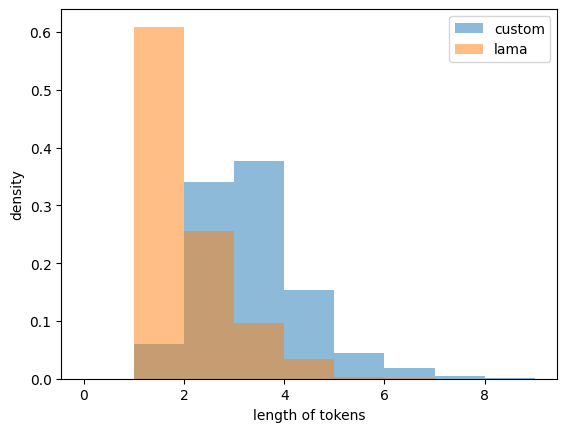

In [13]:
import matplotlib.pyplot as plt

plt.hist(custom_ood_token_lens, density=True, alpha=0.5, bins=[i for i in range(10)], label="custom")
plt.hist(lama_ood_token_lens, density=True, alpha=0.5, bins=[i for i in range(10)], label="lama")

plt.xlabel("length of tokens")
plt.ylabel("density")
plt.legend()

In [16]:
sft_model_path =  "ckpts/sft_lama_GPT2_commit/checkpoint_10000/hf_model"
sft_generation_categories_custom = np.load(sft_model_path+"/generation_categories_trex_ood_idxs_128+.npy")

sft_generation_categories_lama = np.load(sft_model_path+"/generation_categories.npy")

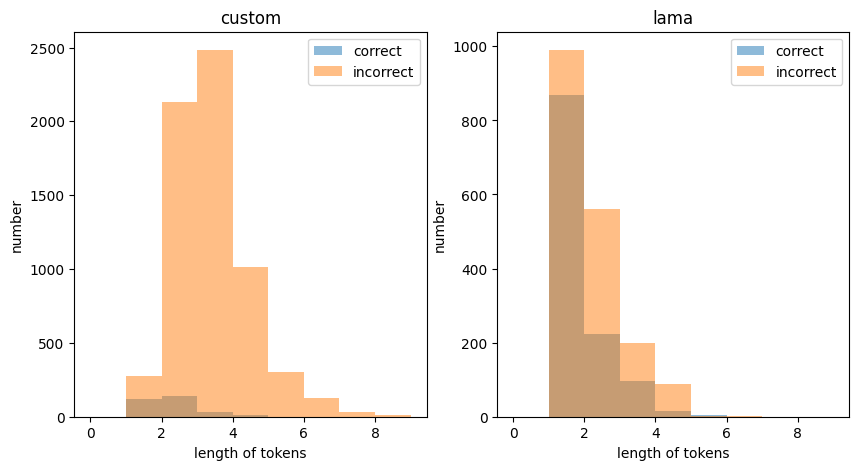

In [22]:
#make 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

custom_correct_idxs = np.where(sft_generation_categories_custom[:, 1] == 1)[0]
custom_incorrect_idxs = np.where(sft_generation_categories_custom[:, 1] == 0)[0]

axs[0].hist(custom_ood_token_lens[custom_correct_idxs], alpha=0.5, bins=[i for i in range(10)], label="correct")
axs[0].hist(custom_ood_token_lens[custom_incorrect_idxs], alpha=0.5, bins=[i for i in range(10)], label="incorrect")
axs[0].set_title("custom")
axs[0].set_xlabel("length of tokens")
axs[0].set_ylabel("number")
axs[0].legend()


ood_idxs = np.where(sft_generation_categories_lama[:, 0] == 3)[0]
lama_correct_idxs = np.where(sft_generation_categories_lama[ood_idxs, 1] == 1)[0]
lama_incorrect_idxs = np.where(sft_generation_categories_lama[ood_idxs, 1] == 0)[0]

axs[1].hist(lama_ood_token_lens[lama_correct_idxs], alpha=0.5, bins=[i for i in range(10)], label="correct")
axs[1].hist(lama_ood_token_lens[lama_incorrect_idxs], alpha=0.5, bins=[i for i in range(10)], label="incorrect")
axs[1].set_title("lama")
axs[1].set_xlabel("length of tokens")
axs[1].set_ylabel("number")
axs[1].legend()
